# Haberman Cancer Survival DataSet

### Relevant Information
* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

* Number of DataPoints: 306 DataPoints.
* Input and Output Variables: 3 independent variable(input variables) and one dependent variable(output variables).

### Attribute Information
* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status 1 = the patient survived 5 years or longer
* Survival ststus 2 = the patient died within 5 year



# 1. Objective: 
To predict the patient's survival who has undergone surgery for breast cancer based on patient's age,year of operation and positive lymph nodes.

# 2. High level statistics of the dataset

In [88]:
import numpy as np  #Data analysis and manipulation
import pandas as pd  #Numerical operations
#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Warnings
import warnings
warnings.filterwarnings("ignore")

haber=pd.read_csv("haberman.csv") #reading a haberman csv file using Pandas

In [89]:
haber.shape # Number of datapoints present in Dataset (rows,columns)

(306, 4)

In [90]:
haber.head(10) # Top 10 DataPoints

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [91]:
haber.columns # Number of columns present in DataSet i.e input variables(age,year,nodes) and output variables(status)

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [92]:
haber.describe()  #mathematical properties

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [93]:
haber["status"].value_counts()
#contains two sets of classes i.e. Survival status= 1 and Survival status=2
#represnts a imbalnced datasets as the number of datapoints differ for both of the classes.

1    225
2     81
Name: status, dtype: int64

# 3. Univariant Analysis

## 3.1. Histograms, PDF ,CDF

### 3.1.1. 1-D Scatter Plot

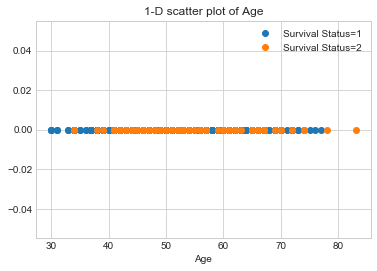

In [94]:
import numpy as np
haber_survival1=haber.loc[haber["status"]==1]  #belongs to Class 1(Survival Status=1)
haber_survival2=haber.loc[haber["status"]==2]  #belongs to Class 2(Survival Status=2)

# Initialising Y axis as zero.
plt.plot(haber_survival1["age"],np.zeros_like(haber_survival1["age"]),'o',label="Survival Status=1")
plt.plot(haber_survival2["age"],np.zeros_like(haber_survival2["age"]),'o',label="Survival Status=2")
plt.xlabel("Age")
plt.legend()
plt.title("1-D scatter plot of Age")
plt.show()

#1-D plots can be visulalised better by using Histogram. 

#### Observations
* Most of the data points are overlapping in this case.
* Very difficult to count the data points shown in this plot.
* Thus 1-D scatter plot is not a good choice for this dataset.

### 3.1.2.  PDF
 Probability Density Function (PDF) is the probability that the variable takes a value x. (smoothed version of the histogram)

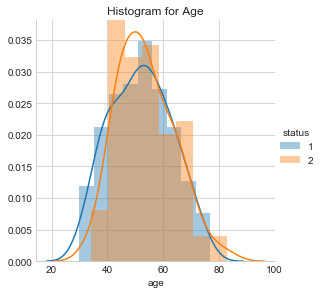

In [95]:
# Histogram for Age
sns.FacetGrid(haber,hue="status",size=4)\
.map(sns.distplot,"age")\
.add_legend()
plt.title("Histogram for Age")
plt.show()

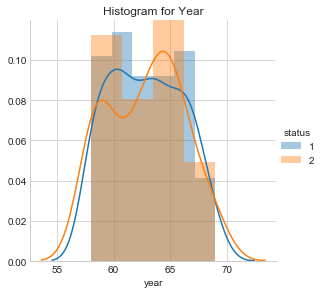

In [96]:
#Histogram for Year
sns.FacetGrid(haber,hue="status",size=4)\
.map(sns.distplot,"year")\
.add_legend()
plt.title("Histogram for Year")
plt.show()

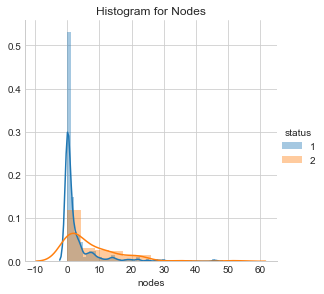

In [97]:
# Histogram for Nodes
sns.FacetGrid(haber,hue="status",size=4)\
.map(sns.distplot,"nodes")\
.add_legend()
plt.title("Histogram for Nodes")
plt.show()

#### Observations
* Histogram in case of age and year almost look similar for both the classes and are overlapping.
* Most survival patients falls into Zero positive lymph nodes.
* Although in this case of nodes there is some difference in their plots.But this difference is not so considerable for classifying them to different survival classes.
* Thus it is difficult to classify them based on histogram plot.

### 3.1.3. PDF and CDF
The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x

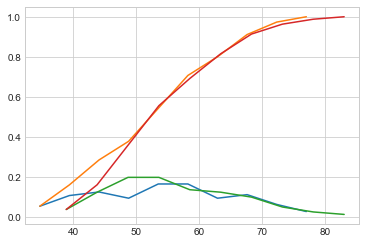

In [98]:
#Combined CDF and PDF with Classes 1 and 2
#Plot CDF and PDF of age with Class=1
counts, bin_edges = np.histogram(haber_survival1['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#Plot CDF and PDF of age with Class=2
counts,bin_edges=np.histogram(haber_survival2['age'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

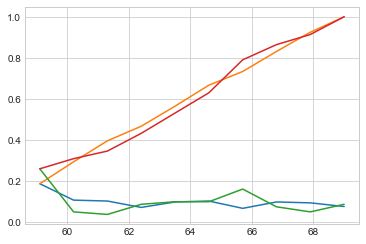

In [99]:
#Combined CDF and PDF with Classes 1 and 2
#Plot CDF and PDF of year with Class=1
counts, bin_edges = np.histogram(haber_survival1['year'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#Plot CDF and PDF of year with Class=2
counts,bin_edges=np.histogram(haber_survival2['year'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

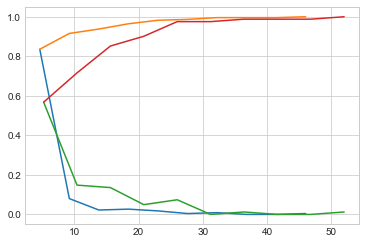

In [100]:
#Combined CDF and PDF with Classes 1 and 2
#Plot CDF and PDF of nodes with Class=1
counts, bin_edges = np.histogram(haber_survival1['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#Plot CDF and PDF of nodes with Class=2
counts,bin_edges=np.histogram(haber_survival2['nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

#### Observations
* The CDF of both the classes are overlapping and thus these input variables cannot help to classifying them into different survival classes. 

## 3.2 Mean, Variance and Std-dev

In [101]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haber_survival1["age"]))
#Mean with an outlier.
print(np.mean(np.append(haber_survival1["age"],2018)));
print(np.mean(haber_survival2["age"]))

print("\nStd-dev:");
print(np.std(haber_survival1["age"]))
print(np.std(haber_survival2["age"]))

Means:
52.01777777777778
60.716814159292035
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131


#### Observations
* The mean value is corrupted by an outliner. And thus corrupting the details of entire dataset.

## 3.3 Median, Percentile, Quantile, IQR, MAD

In [102]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haber_survival1["age"]))
#Median with an outlier
print(np.median(np.append(haber_survival1["age"],2018)));
print(np.median(haber_survival2["age"]))

print("\nQuantiles:")
print(np.percentile(haber_survival1["age"],np.arange(0, 100, 25)))
print(np.percentile(haber_survival2["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haber_survival1["age"],90))
print(np.percentile(haber_survival2["age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haber_survival1["age"]))
print(robust.mad(haber_survival2["age"]))


Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


#### Observations:
* The median value is not corrupted by Outliners as in case of mean.
* This holds true until numbers of outliners value is less than 50%.

## 3.4 Box Plots and Whiskers
* It divides the dataset into three quartiles.ie.25%,50% and 75%.
* 50% represents the medain.
* Top and bottom whiskers represents maximum and minimum value in the dataset
* Whsikers is calculated in different ways:
    * Min and Max values of datasets.
    * 1.5*IQR in case of Seaborn where IQR=(75%-25%)

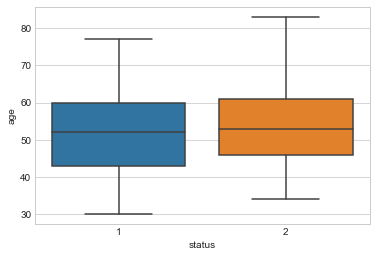

In [103]:
sns.boxplot(x="status",y="age",data=haber)
plt.show()

#### Observations
* 25-75 percentile lies between ages 45 to 60 for class 1 and 48 to 62 for class 2.
* The median value for class 1 is 52(50 Percentile) and for class 2 is 53(50 Percentile).


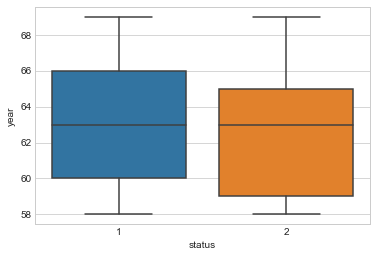

In [104]:
sns.boxplot(x="status",y="year",data=haber)
plt.show()

#### Observations
* The median value for class 1 is 1963 and for class 2 is 1963.
* The patients's who had operation before 1959 has less chances of survival as compared to patient who had operation after 1966. But this cannot be considered as key variable as dataset is small.

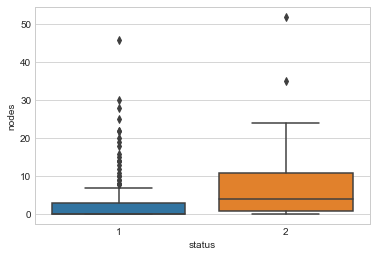

In [105]:
sns.boxplot(x="status",y="nodes",data=haber)
plt.show()

#### Observations
* The median value for class 1 is 0. And 25% and 50% overlap.
* The median value for class 2 is 4.
* The number of positive lymph nodes is 2 in the 25-75 percentile range in class 1 and is 12 in case of class 2.
* Thus nodes can be considered as a variable which determines the status of the patient.ie.belongs to class 1 or 2.

## 3.5 Violin Plots
* It gives the Combined information of the PDF and box plot.
* Curve denotes the PDF and middle area denotes the box plot.

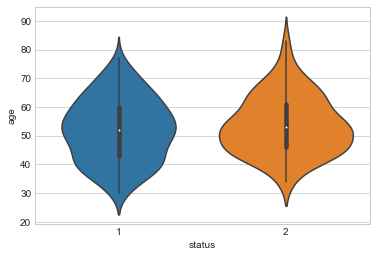

In [106]:
sns.violinplot(x="status",y="age",data=haber,size=4)
plt.show()

#### Observations
* Patients aged around 55 yrs belongs to 50 Percentile,aged 60 to 75 percentile and aged 42 to 25 Percentile in case of class 1.
* Patients aged around 55 yrs belongs to 50 Percentile,aged 60 to 75 percentile and aged 45 to 25 Percentile in case of class 2.
* This variable does not give suficient information for classifying them into different classes.

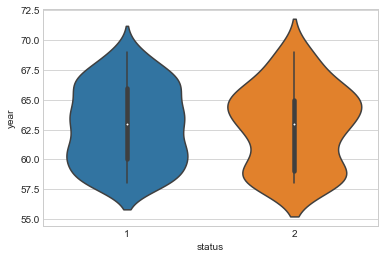

In [107]:
sns.violinplot(x="status",y="year",data=haber,size=4)
plt.show()

#### Observations
* Patients who had operation in the year 1963 belongs to 50 Percentile,1966 to 75 percentile and 1960 to 25 Percentile in case of class 1.
* Patients who had operation in the year 1963 belongs to 50 Percentile,1965 to 75 percentile and 1968 to 25 Percentile in case of class 2.
* The patients treated after 1966 have the slightly higher chance to survive that the rest. The patients treated before 1959 have the slightly lower chance to survive that the rest.


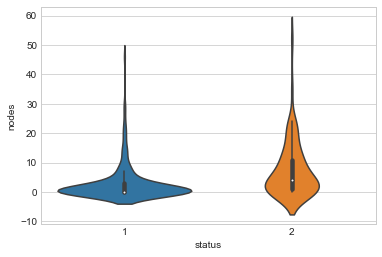

In [108]:
sns.violinplot(x="status",y="nodes",data=haber,size=4)
plt.show()

#### Observations
* Patients having positive nodes 0 belongs to 50 Percentile,8 nodes to 75 percentile in case of class 1.
* Patients having positive nodes 4 belongs to 50 Percentile,12 nodes to 75 percentile and 0 nodes to 25 Percentile in case of class 2.
* Most of the patients are found to have 10 or less positive lymph nodes in both the classes. 

# 4. Bivariant Analysis

## 4.1.  2-D Scatter Plot

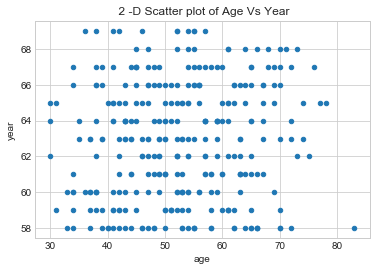

In [109]:
haber.plot(kind="scatter",x="age",y="year") #kind represents type of plotting method.In this case scatter plot is used.
plt.title(" 2 -D Scatter plot of Age Vs Year")
plt.show()

#### Observations:
* Cannot distinguish the status ie. Wheather Status is Class 1 or Class 2.

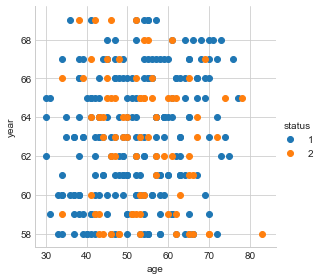

In [110]:
# 2-D scatter plot with color-coding
sns.set_style("whitegrid")
sns.FacetGrid(haber,hue="status",size=4)\
.map(plt.scatter,"age","year")\
.add_legend()
plt.show()

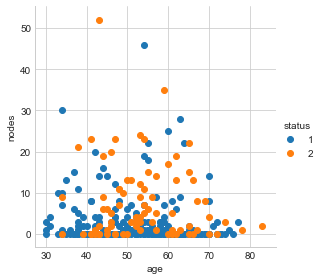

In [111]:
sns.set_style("whitegrid")
sns.FacetGrid(haber,hue="status",size=4)\
.map(plt.scatter,"age","nodes")\
.add_legend()
plt.show()

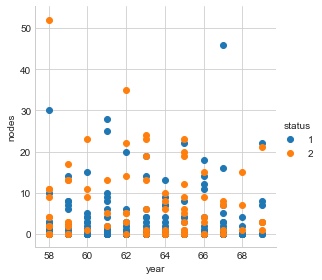

In [112]:
sns.set_style("whitegrid")
sns.FacetGrid(haber,hue="status",size=4)\
.map(plt.scatter,"year","nodes")\
.add_legend()
plt.show()

#### Observations:
* Cannot seperate the classes by drawing line(linearly seperable) as most of the points are overlapping in all above 3 cases.

## 4.2. Pair Plots

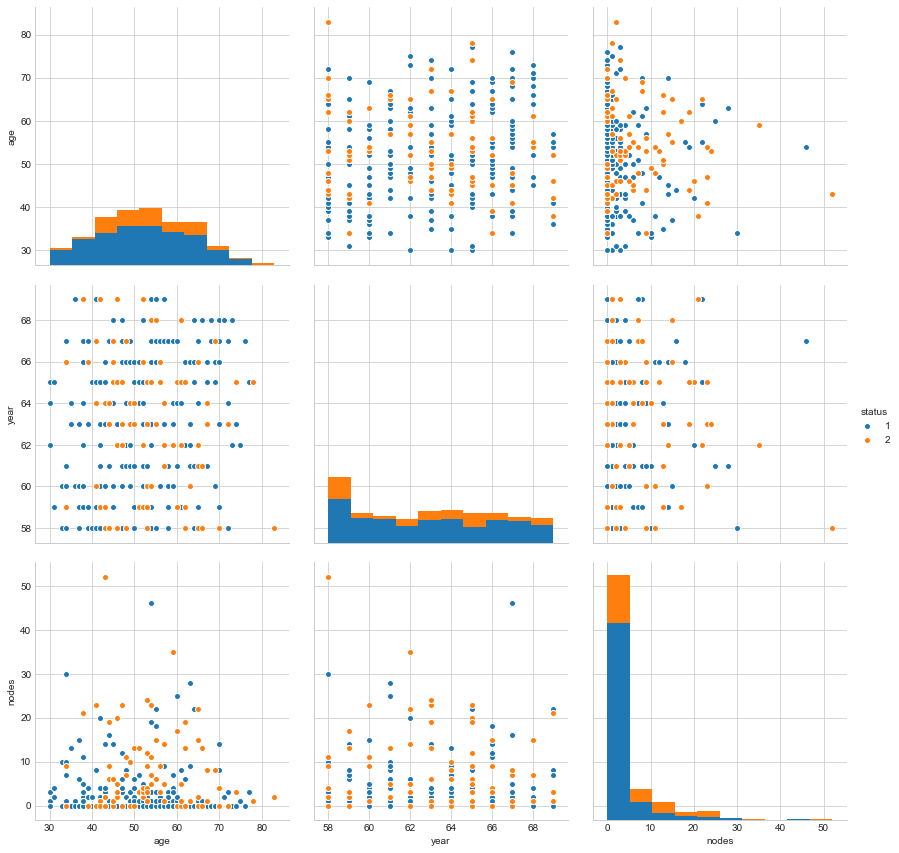

In [113]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haber,hue="status", vars=['age','year','nodes'],size=4)  #pair plot of 3 input variables 
plt.show()
# Diagonal elements shows PDF

#### Obsrervations
* All points are overlapping in all the cases shown above and they are not linearly seperable.
* Thus we are not able to classify which input variable is highly useful for predicting the output variable. 
* Therefore this plot is not suitable in this case.

#  5. Multivariate probability density, contour plot.

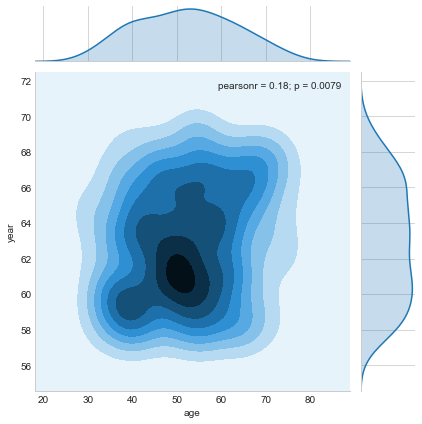

In [114]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="year", data=haber_survival1, kind="kde");
plt.show();

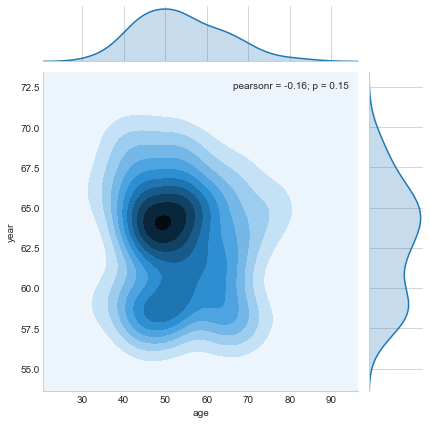

In [115]:
sns.jointplot(x="age", y="year", data=haber_survival2, kind="kde");
plt.show();

### Conclusions

* The given dataset is imbalanced as the difference between both the survival classes is large.
* The input variables provided for predicting the output variable does not give the sufficient information to classiy them into different survival classes.
* The node input variable gives some information for classifying them. But is not enough to classify them properly as dataset is small.
* The plots are overlapping in almost all cases which make them difficult to seperate linearly.(Not Linearly Seperable)